**Description:** This file contains test code for the proposed acquisition function when used to solve two-objective optimization problems. We use four test problems: Fonseca, Kursawe, Omni, and ZDT3.
- If you want to test a GP model different from the one used in the paper, use the src/vanilla_GP_model.py file to modify the model (kernel and mean function).
- The proposed and benhcmark approaches make use of tensorflow-probability version 0.23.0. A different version migth lead to execution errors. Check the requirements.txt file for the necessary libraries to test the repo.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp # Be sure that you have installed this version: tensorflow-probability==0.23.0
import gpflow as gpf
import scipy.io
from sklearn.preprocessing import MinMaxScaler
from pymoo.indicators.hv import HV
import warnings
warnings.filterwarnings("ignore")

# Import in-house functions for multiobjective optimization
import src.test_functions as test_function
from src.vanilla_GP_model import build_GPR_model_EPDC
from src.vanilla_GP_model import train_gp_model_EPDC
from src.EPDC import acquisition_function_2_obj as EPDC_2_obj
from src.find_pareto import Pareto_front
from src.optimization import find_new_design_EPDC

d:\Github_projects\jmd-epdc\.venv\Lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
d:\Github_projects\jmd-epdc\.venv\Lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


**Fonseca test problem:** Problem with a non-convex Pareto front and two design variables.

Optimization settings

In [ ]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 100 # Total number of iterations
n_dimensions = 2 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((-4*np.ones((1,n_dimensions)),4*np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

n_mc_samples = 300  # Number of Monte-Carlo samples to estimate the EPDC
gamma_dominated = -1 # Penalization weigth of dominated monte-carlo samples used by the EPDC
gamma_pareto = 1 # Penalization weigth of optimal monte-carlo samples used by the EPDC
num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([1., 1.]) # Reference point for calculation of dominated hypervolume

Optimization loop

Iteration: 1
New design: [-0.4633427  -0.09082463]
Initial HV: 0.012290774606169553
Current HV: 0.012290774606169553
Acquisition function: 0.6475734
Distance to closest Pareto design: 0.5475734
Similar design penalization: 1.0


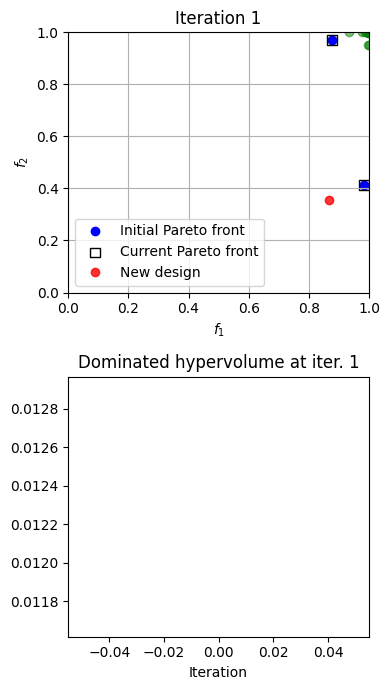

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
New design: [-0.2622588   0.26328223]
Initial HV: 0.012290774606169553
Current HV: 0.15850736698962387
Acquisition function: 0.22580957
Distance to closest Pareto design: 0.15662533
Similar design penalization: 0.6918425


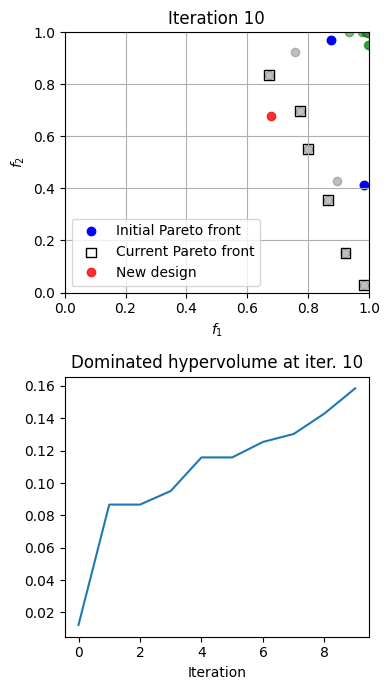

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
New design: [-0.75590572 -0.56864883]
Initial HV: 0.012290774606169553
Current HV: 0.2757133325238833
Acquisition function: 0.09957267
Distance to closest Pareto design: 0.010526351
Similar design penalization: 0.89046323


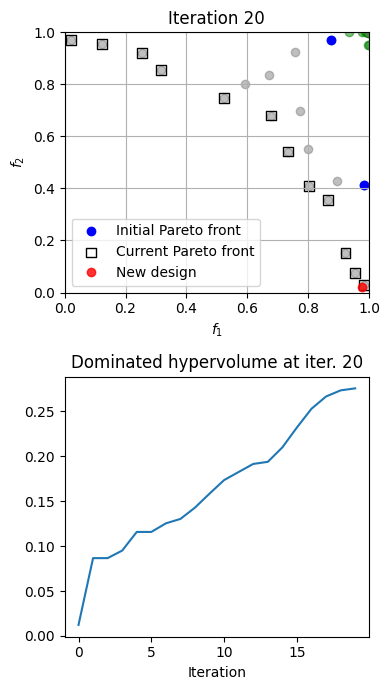

Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
New design: [0.55228137 0.47394555]
Initial HV: 0.012290774606169553
Current HV: 0.2896259691874478
Acquisition function: 0.10018378
Distance to closest Pareto design: 0.03379684
Similar design penalization: 0.6638694


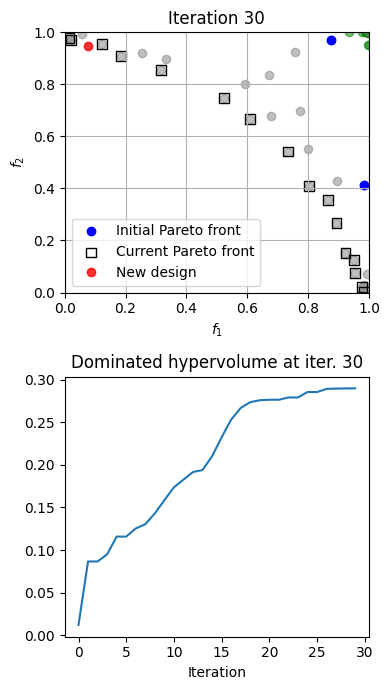

Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
New design: [-0.36539361 -0.83908645]
Initial HV: 0.012290774606169553
Current HV: 0.2937380849506942
Acquisition function: 0.044788618
Distance to closest Pareto design: -0.0291822
Similar design penalization: 0.7397082


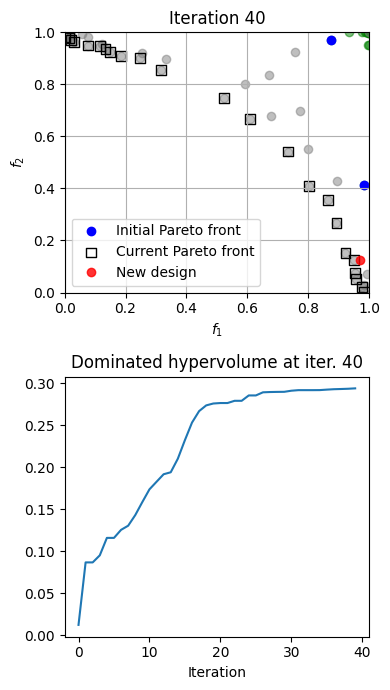

Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
New design: [ 0.04307293 -0.35367195]
Initial HV: 0.012290774606169553
Current HV: 0.3072269240878709
Acquisition function: 0.11005503
Distance to closest Pareto design: 0.027176475
Similar design penalization: 0.82878554


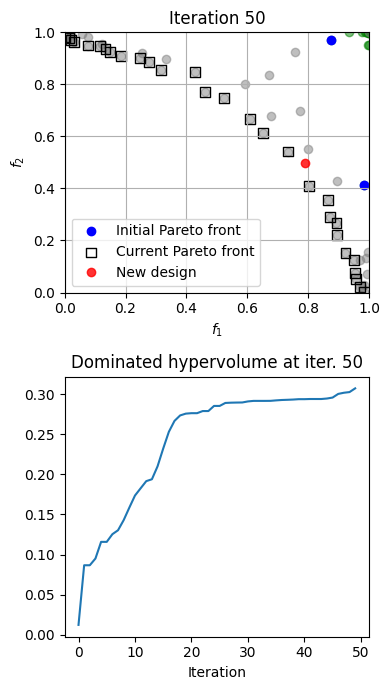

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
New design: [-0.57240301 -0.24320656]
Initial HV: 0.012290774606169553
Current HV: 0.31323097381829923
Acquisition function: 0.050027516
Distance to closest Pareto design: -0.0034472926
Similar design penalization: 0.5347481


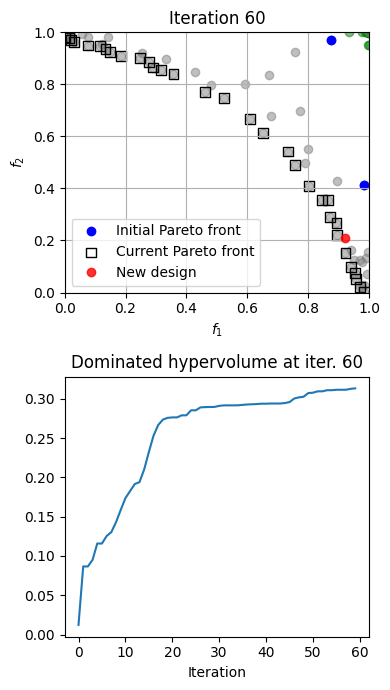

Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
New design: [0.94269936 1.02901307]
Initial HV: 0.012290774606169553
Current HV: 0.31507693807552684
Acquisition function: 0.028237704
Distance to closest Pareto design: -0.054588202
Similar design penalization: 0.82825905


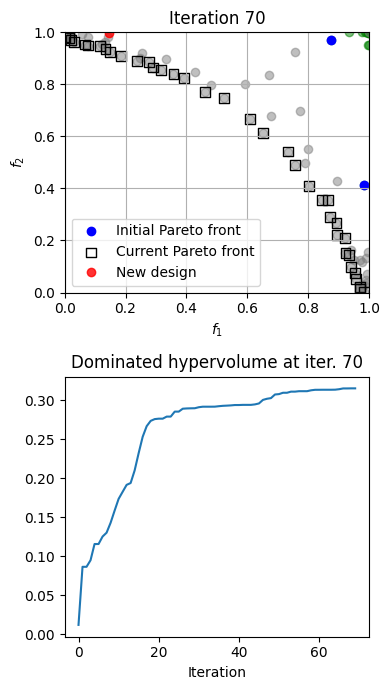

Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
New design: [0.44709268 0.74600938]
Initial HV: 0.012290774606169553
Current HV: 0.31552312865580623
Acquisition function: 0.02914415
Distance to closest Pareto design: -0.014799588
Similar design penalization: 0.43943736


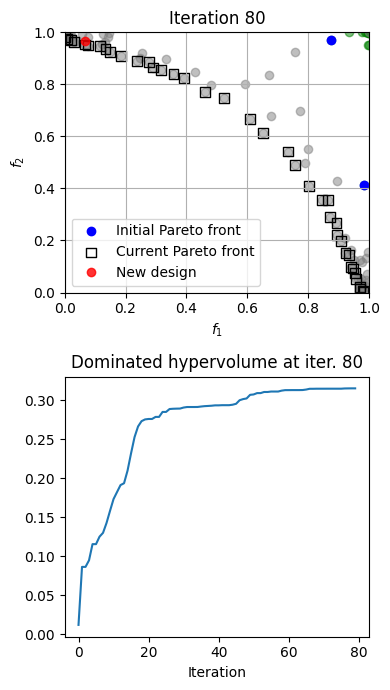

Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
New design: [0.9099418  0.56665904]
Initial HV: 0.012290774606169553
Current HV: 0.31715358837195484
Acquisition function: 0.015786398
Distance to closest Pareto design: -0.03207319
Similar design penalization: 0.47859585


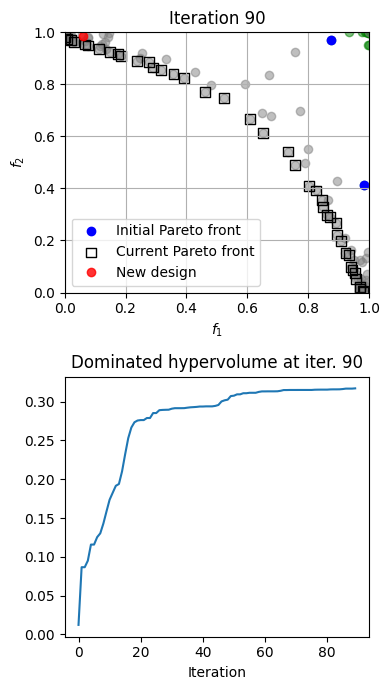

Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
New design: [0.64312797 0.72172415]
Initial HV: 0.012290774606169553
Current HV: 0.31751061224259214
Acquisition function: 0.021920664
Distance to closest Pareto design: 0.0016936727
Similar design penalization: 0.2022699


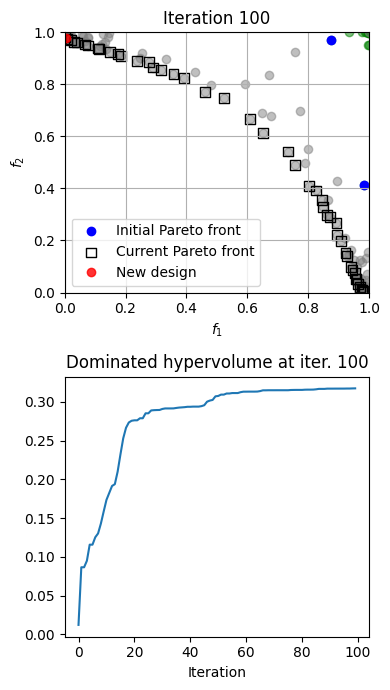

Optimization completed ...


In [3]:
# Import initial sampling plan. We are using a sampling plan located in the data directory to enable reproducibility of results.
X_train_dic = scipy.io.loadmat('data/two_objective_Fonseca_2_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = test_function.Fonseca(X_train, n_dimensions)
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model_EPDC(X_train_n, f1_train)
    m2 = build_GPR_model_EPDC(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model_EPDC(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model_EPDC(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EPDC(GPR_models, EPDC_2_obj, X_train_n, PFn, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = test_function.Fonseca(x_new_original, n_dimensions)

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, Expected_min_distance_i, penal_dist_x_i = EPDC_2_obj(x_new, GPR_models, X_train_n, PFn, Sigmoid_X, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)
    
    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("Distance to closest Pareto design:", Expected_min_distance_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='lower left')
        ax1.set_xlim([0, 1])
        ax1.set_ylim([0, 1])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')

**Kursawe test problem:** Problem with a segmented Pareto front and three design variables.

Optimization settings

In [6]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 100 # Total number of iterations
n_dimensions = 3 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((-5*np.ones((1,n_dimensions)),5*np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

n_mc_samples = 300  # Number of Monte-Carlo samples to estimate the EPDC
gamma_dominated = -1 # Penalization weigth of dominated monte-carlo samples used by the EPDC
gamma_pareto = 1 # Penalization weigth of optimal monte-carlo samples used by the EPDC
num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([-6., 15.])# Reference point for calculation of dominated hypervolume

Optimization loop

Iteration: 1
New design: [-0.30257986  0.18228814  0.15885789]
Initial HV: 137.77833276623036
Current HV: 137.77833276623036
Acquisition function: 0.48221397
Distance to closest Pareto design: 0.38221398
Similar design penalization: 1.0


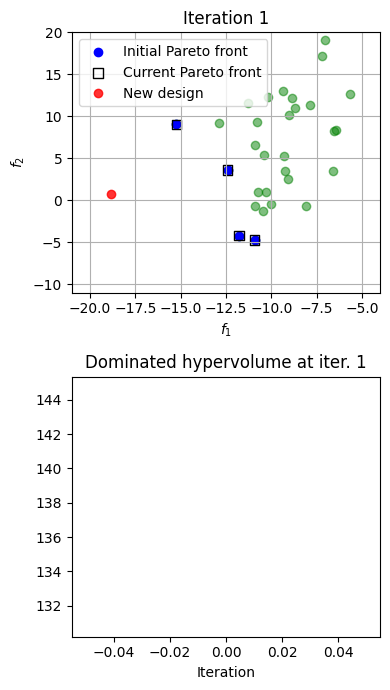

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
New design: [ 2.58834078  4.22898593 -1.16248434]
Initial HV: 137.77833276623036
Current HV: 236.83379469482594
Acquisition function: 0.12102276
Distance to closest Pareto design: 0.026064044
Similar design penalization: 0.9495871


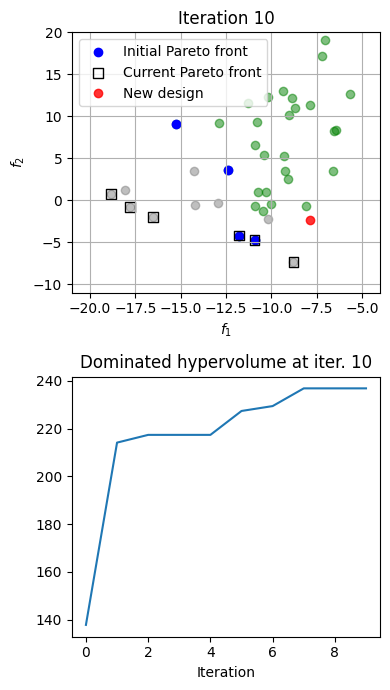

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
New design: [-1.28406321  0.68109023  0.16377179]
Initial HV: 137.77833276623036
Current HV: 246.22515792690035
Acquisition function: 0.096665405
Distance to closest Pareto design: 0.0012579167
Similar design penalization: 0.95407486


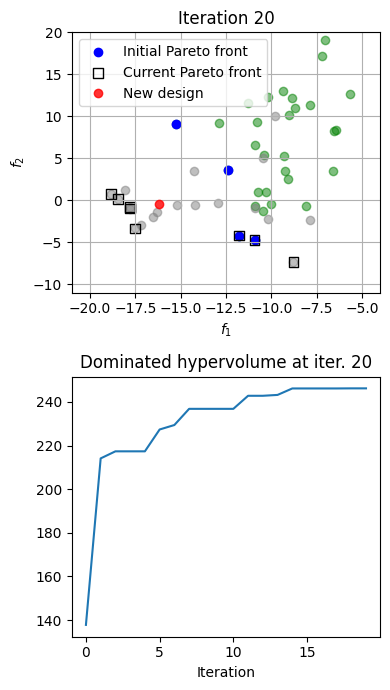

Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
New design: [-1.18130042 -0.03290109  0.55477188]
Initial HV: 137.77833276623036
Current HV: 255.04346249391875
Acquisition function: 0.09164986
Distance to closest Pareto design: 0.008461183
Similar design penalization: 0.83188677


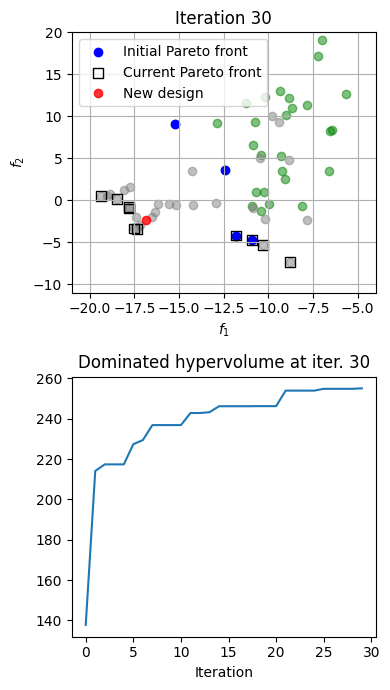

Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
New design: [-1.10539215 -0.33695953 -0.11013145]
Initial HV: 137.77833276623036
Current HV: 271.8391442057232
Acquisition function: 0.09026706
Distance to closest Pareto design: 0.03896483
Similar design penalization: 0.5130223


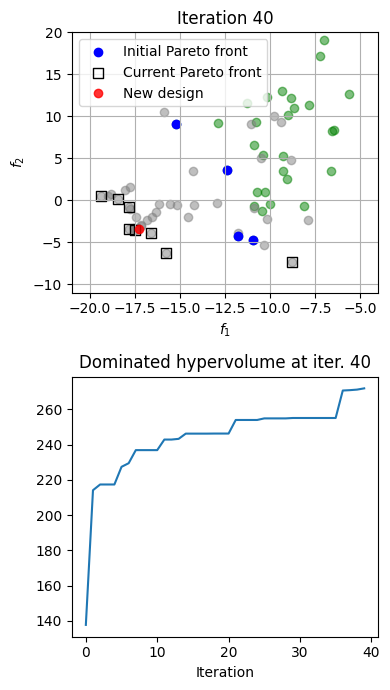

Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
New design: [-1.10018699  0.27836576  0.28285747]
Initial HV: 137.77833276623036
Current HV: 273.1709760189047
Acquisition function: 0.0466363
Distance to closest Pareto design: -0.017455151
Similar design penalization: 0.6409145


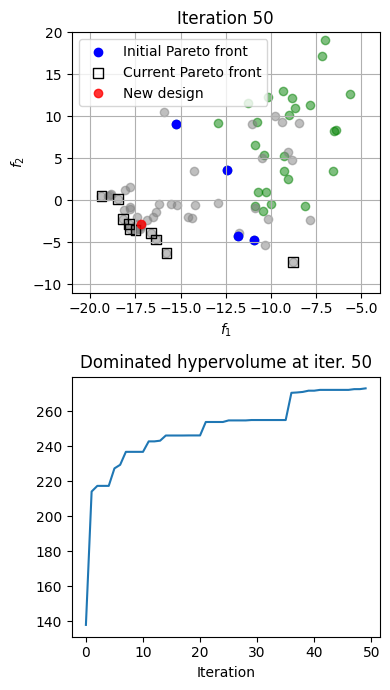

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
New design: [ 2.58149357  3.66399171 -0.78263832]
Initial HV: 137.77833276623036
Current HV: 273.28142789651343
Acquisition function: 0.070103146
Distance to closest Pareto design: 0.0038520845
Similar design penalization: 0.66251063


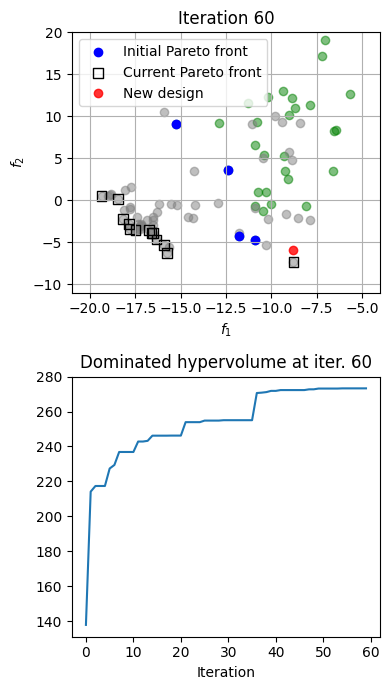

Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
New design: [-1.09466374  0.09190007  0.38837175]
Initial HV: 137.77833276623036
Current HV: 273.541962580229
Acquisition function: 0.11508072
Distance to closest Pareto design: 0.06347549
Similar design penalization: 0.5160523


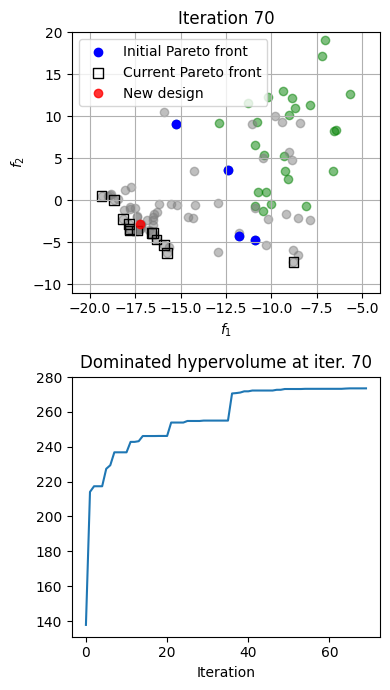

Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
New design: [-0.98320043  0.12168997  0.10723508]
Initial HV: 137.77833276623036
Current HV: 279.4491547340531
Acquisition function: 0.03849806
Distance to closest Pareto design: -0.0052526556
Similar design penalization: 0.43750715


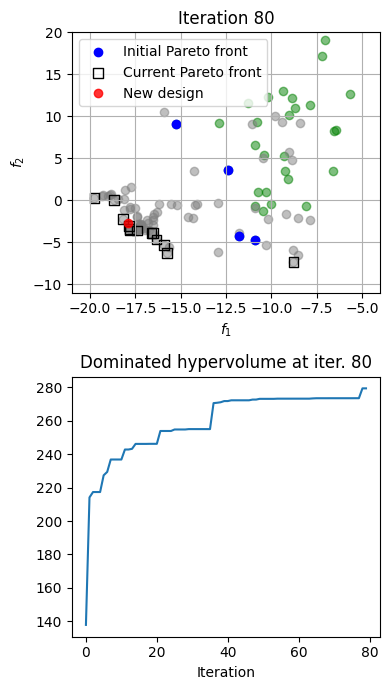

Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
New design: [-1.07855992 -0.7198219   0.24518358]
Initial HV: 137.77833276623036
Current HV: 281.19875958947097
Acquisition function: 0.045971785
Distance to closest Pareto design: 0.0015116893
Similar design penalization: 0.44460094


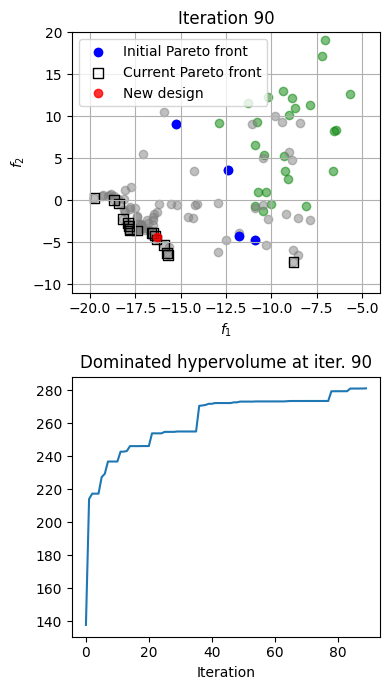

Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
New design: [-1.12985209 -0.04015258 -0.07499082]
Initial HV: 137.77833276623036
Current HV: 281.3249096965967
Acquisition function: 0.03708921
Distance to closest Pareto design: 0.0063757217
Similar design penalization: 0.30713487


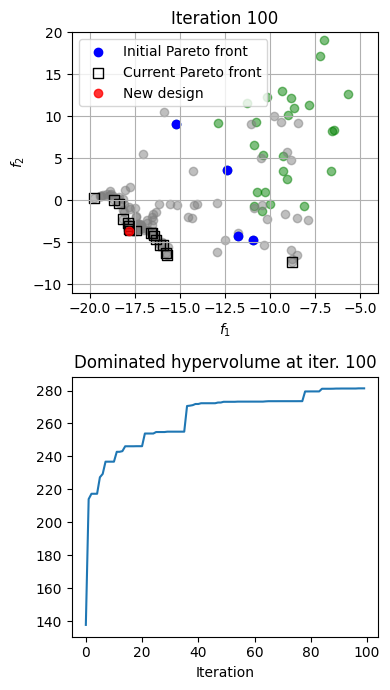

Optimization completed ...


In [7]:
# Import initial sampling plan. We are using a sampling plan located in the data directory to enable reproducibility of results.
X_train_dic = scipy.io.loadmat('data/two_objective_Kursawe_3_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = test_function.Kursawe(X_train)
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model_EPDC(X_train_n, f1_train)
    m2 = build_GPR_model_EPDC(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model_EPDC(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model_EPDC(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EPDC(GPR_models, EPDC_2_obj, X_train_n, PFn, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = test_function.Kursawe(x_new_original)

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, Expected_min_distance_i, penal_dist_x_i = EPDC_2_obj(x_new, GPR_models, X_train_n, PFn, Sigmoid_X, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)

    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("Distance to closest Pareto design:", Expected_min_distance_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='upper left')
        ax1.set_xlim([-21, -4])
        ax1.set_ylim([-11, 20])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')

**Omni test problem:** Problem with a convex Pareto front and six design variables.

Optimization settings

In [8]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 200 # Total number of iterations
n_dimensions = 6 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((np.zeros((1,n_dimensions)),6*np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

n_mc_samples = 300  # Number of Monte-Carlo samples to estimate the EPDC
gamma_dominated = -1 # Penalization weigth of dominated monte-carlo samples used by the EPDC
gamma_pareto = 1 # Penalization weigth of optimal monte-carlo samples used by the EPDC
num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([0., 0.]) # Reference point for calculation of dominated hypervolume

Optimization loop

Iteration: 1
New design: [2.74801799 0.16593385 1.33839571 2.50767056 4.63981314 3.13784024]
Initial HV: 11.40399202670268
Current HV: 11.40399202670268
Acquisition function: 0.20164049
Distance to closest Pareto design: 0.101640485
Similar design penalization: 1.0


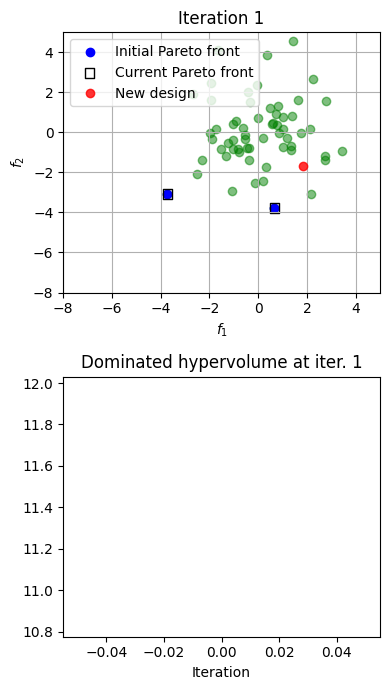

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
New design: [2.84542512 5.44875551 1.15014486 2.70365204 1.71096778 3.53167648]
Initial HV: 11.40399202670268
Current HV: 11.444997943769607
Acquisition function: 0.32082203
Distance to closest Pareto design: 0.22082204
Similar design penalization: 1.0


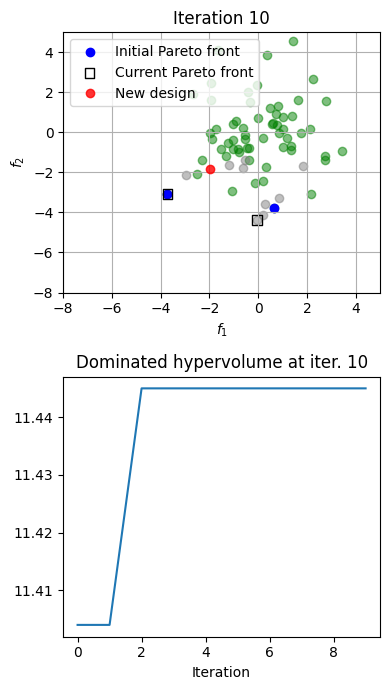

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
New design: [2.8077846  5.46982927 1.16584584 1.43069997 1.50106817 5.07058013]
Initial HV: 11.40399202670268
Current HV: 12.259990064919691
Acquisition function: 0.2273753
Distance to closest Pareto design: 0.12737682
Similar design penalization: 0.99998474


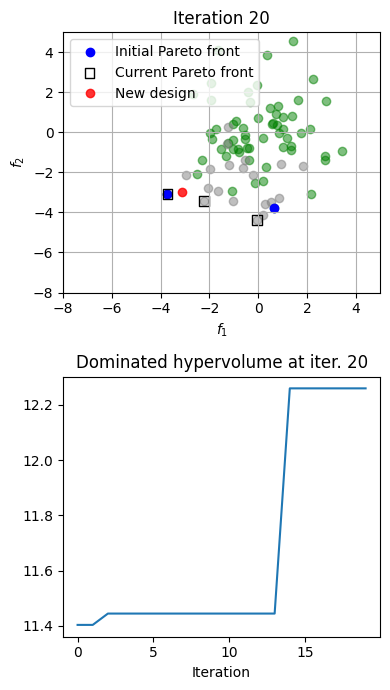

Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
New design: [2.46723852 5.89422468 1.16546154 5.12431322 0.44881453 4.99549534]
Initial HV: 11.40399202670268
Current HV: 13.714007486007963
Acquisition function: 0.15867391
Distance to closest Pareto design: 0.058784366
Similar design penalization: 0.99889535


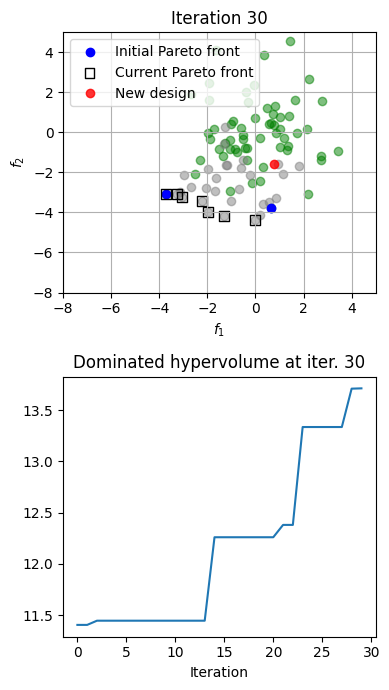

Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
New design: [2.57799291 5.47690934 1.12969161 5.40030432 3.44649636 5.00207184]
Initial HV: 11.40399202670268
Current HV: 14.431200246737372
Acquisition function: 0.17907521
Distance to closest Pareto design: 0.08370176
Similar design penalization: 0.9537344


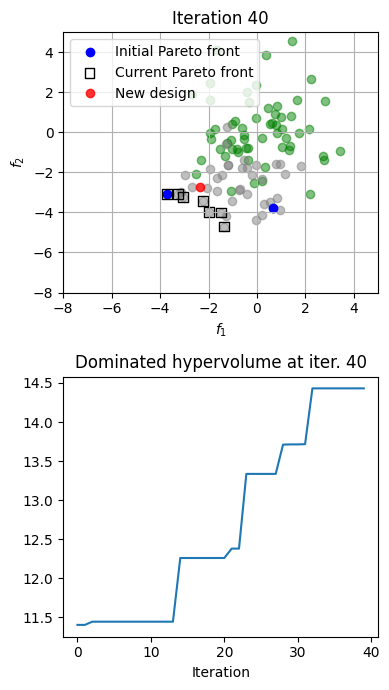

Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
New design: [3.2817602  5.54385285 1.18104102 3.85587677 1.40623877 5.09269651]
Initial HV: 11.40399202670268
Current HV: 18.096066994187932
Acquisition function: 0.13049
Distance to closest Pareto design: 0.04833943
Similar design penalization: 0.8215058


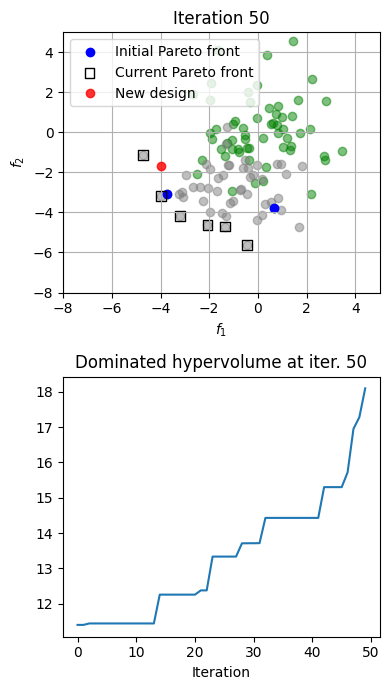

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
New design: [3.23015703 5.31178968 1.08628229 4.98388206 3.18887745 5.08646996]
Initial HV: 11.40399202670268
Current HV: 22.80177474309338
Acquisition function: 0.0896065
Distance to closest Pareto design: 0.012220305
Similar design penalization: 0.77386194


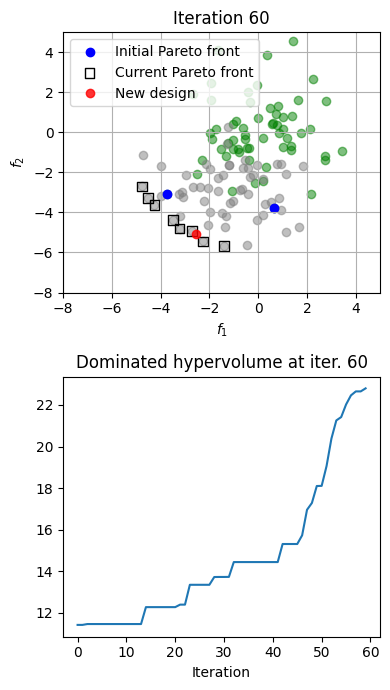

Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
New design: [3.41573023 5.38907355 1.15326049 3.40669779 1.19767735 5.56943105]
Initial HV: 11.40399202670268
Current HV: 24.55949139369597
Acquisition function: 0.08762475
Distance to closest Pareto design: 0.0077543203
Similar design penalization: 0.7987043


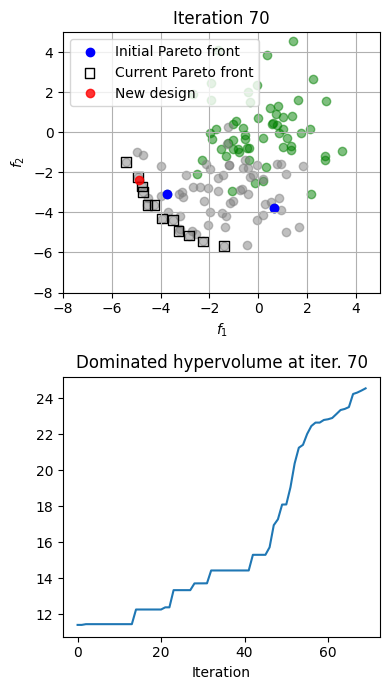

Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
New design: [3.21033456 5.39314232 1.14131339 3.29764603 1.29962892 5.10978741]
Initial HV: 11.40399202670268
Current HV: 25.00677031268488
Acquisition function: 0.070802286
Distance to closest Pareto design: 0.0018023427
Similar design penalization: 0.68999946


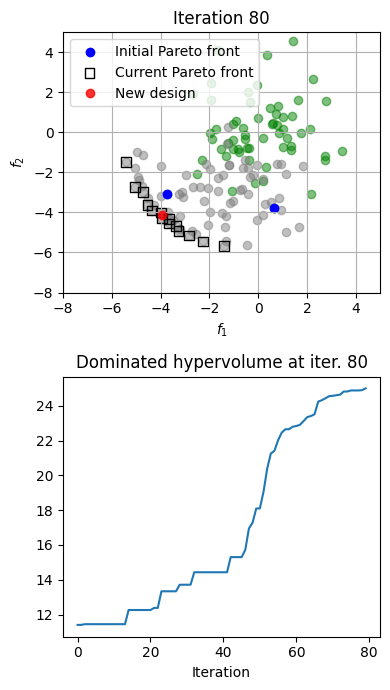

Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
New design: [3.32623088 5.27594094 1.14736423 3.25325614 1.42135534 5.14327522]
Initial HV: 11.40399202670268
Current HV: 25.15655987603514
Acquisition function: 0.057222135
Distance to closest Pareto design: 0.0009672105
Similar design penalization: 0.56254923


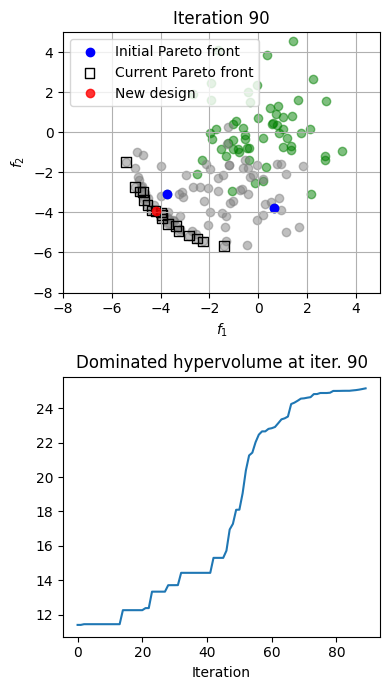

Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
New design: [3.27390407 5.10313549 1.14788657 3.22645556 1.3823862  5.35846497]
Initial HV: 11.40399202670268
Current HV: 25.192668361644763
Acquisition function: 0.057872318
Distance to closest Pareto design: -0.008157751
Similar design penalization: 0.6603007


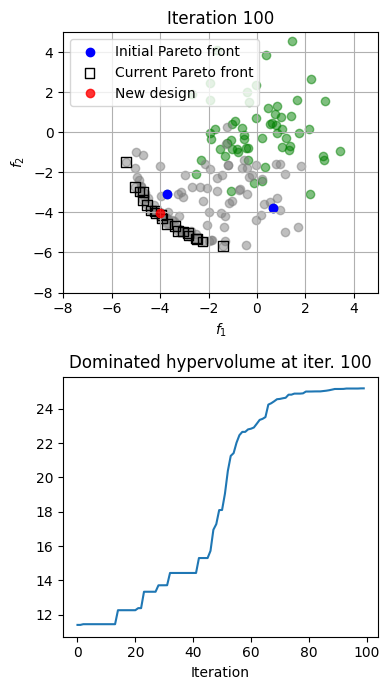

Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
New design: [3.05347896 4.95787083 1.1747503  3.06556622 0.90391267 5.17073689]
Initial HV: 11.40399202670268
Current HV: 25.312145656331275
Acquisition function: 0.06068058
Distance to closest Pareto design: -0.013662268
Similar design penalization: 0.74342847


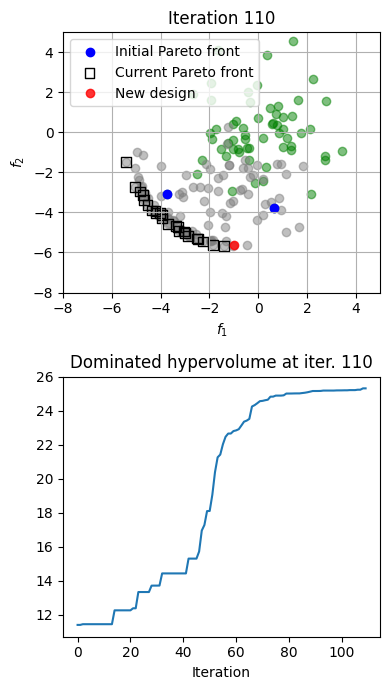

Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
New design: [3.2879996  5.32402111 1.38778713 3.27163734 1.4773901  5.49762194]
Initial HV: 11.40399202670268
Current HV: 25.678106901645094
Acquisition function: 0.080794126
Distance to closest Pareto design: 0.0039922274
Similar design penalization: 0.76801896


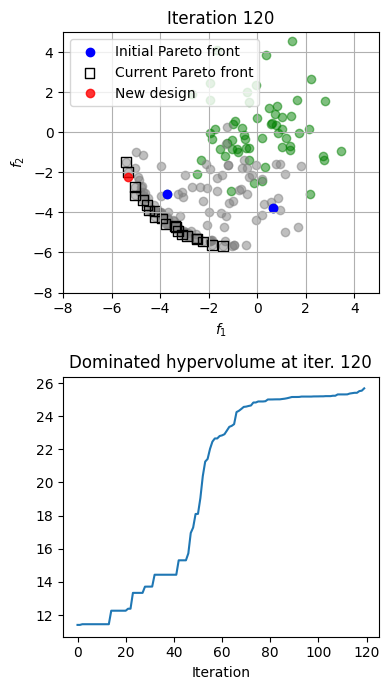

Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126
Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
New design: [3.06834507 5.02567589 0.83348487 5.10481253 3.04996665 5.02688858]
Initial HV: 11.40399202670268
Current HV: 26.362384655255713
Acquisition function: 0.059672065
Distance to closest Pareto design: -0.022120407
Similar design penalization: 0.81792474


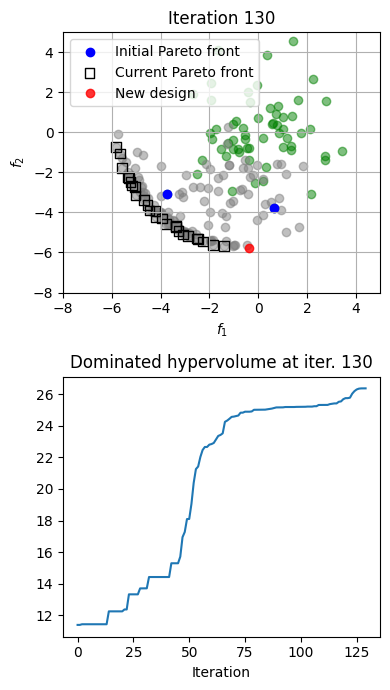

Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
New design: [3.40001892 5.37317951 1.3204253  3.24390508 1.3783184  5.35976234]
Initial HV: 11.40399202670268
Current HV: 26.65044067274382
Acquisition function: 0.067233056
Distance to closest Pareto design: 0.010605087
Similar design penalization: 0.56627965


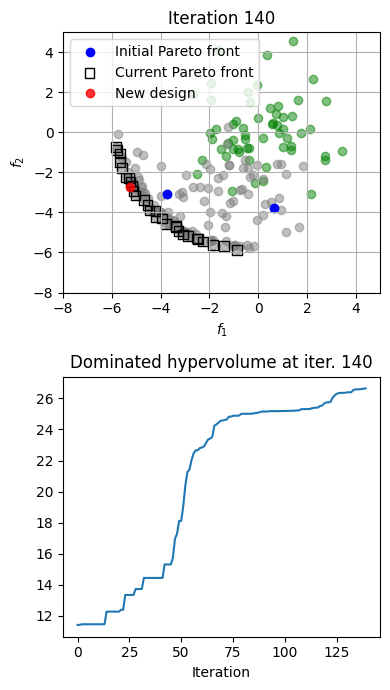

Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
Iteration: 150
New design: [3.38306121 5.07497765 1.32063169 5.26845603 3.26022391 5.237286  ]
Initial HV: 11.40399202670268
Current HV: 26.816800438085817
Acquisition function: 0.06162708
Distance to closest Pareto design: -0.009445627
Similar design penalization: 0.71072704


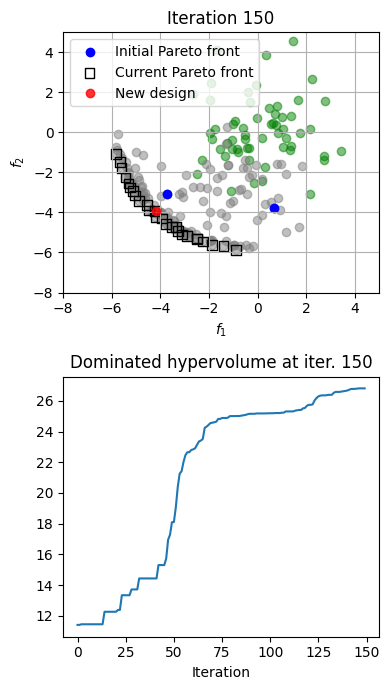

Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
New design: [3.17095663 5.039153   0.92263795 3.12734507 1.11821778 5.09528219]
Initial HV: 11.40399202670268
Current HV: 26.865484534645304
Acquisition function: 0.060018502
Distance to closest Pareto design: -0.012432077
Similar design penalization: 0.7245058


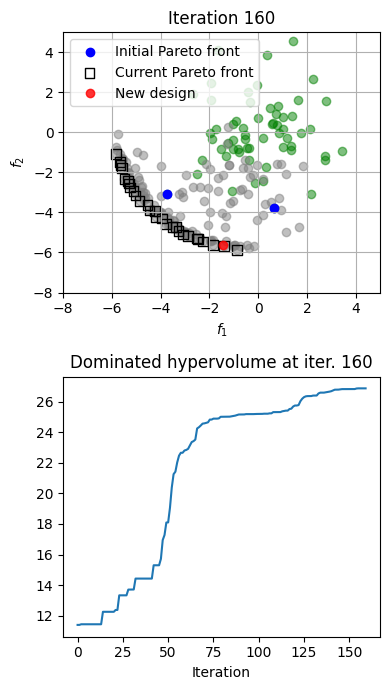

Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
New design: [3.31466801 5.18748491 1.25084316 5.13594713 3.23193878 5.40471579]
Initial HV: 11.40399202670268
Current HV: 26.888387011245506
Acquisition function: 0.054239534
Distance to closest Pareto design: -0.01009567
Similar design penalization: 0.64335203


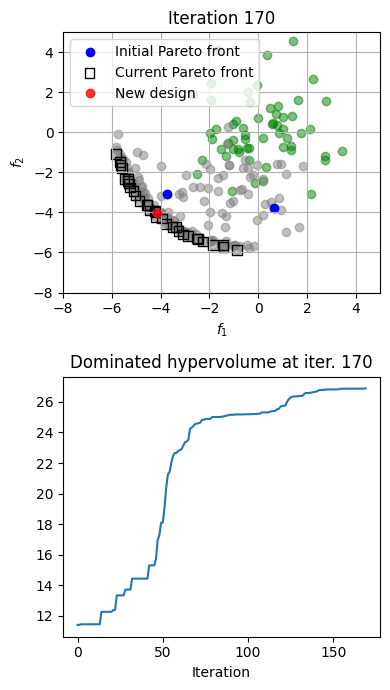

Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176
Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
New design: [3.48058998 5.2560158  1.49615337 5.45457372 3.52289571 5.37336049]
Initial HV: 11.40399202670268
Current HV: 26.90846238432203
Acquisition function: 0.060090613
Distance to closest Pareto design: -0.007467312
Similar design penalization: 0.67557925


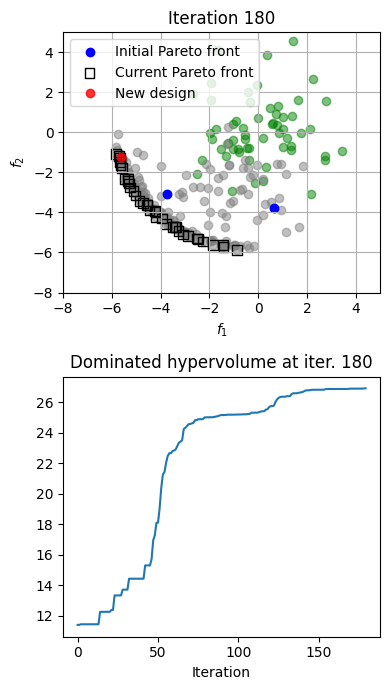

Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
New design: [3.40979384 5.36502449 1.31347019 5.27619627 3.27073493 5.47062601]
Initial HV: 11.40399202670268
Current HV: 27.00266105483035
Acquisition function: 0.053980157
Distance to closest Pareto design: -0.007843297
Similar design penalization: 0.6182345


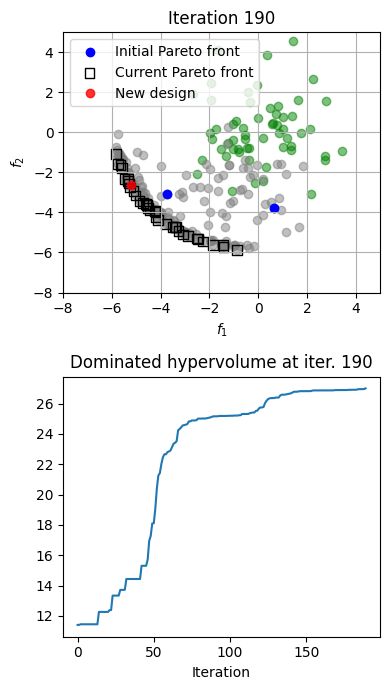

Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
Iteration: 200
New design: [3.27145759 5.33256445 1.35396251 3.25392978 1.07232163 5.30408138]
Initial HV: 11.40399202670268
Current HV: 27.021659656368982
Acquisition function: 0.05504081
Distance to closest Pareto design: -0.008182091
Similar design penalization: 0.632229


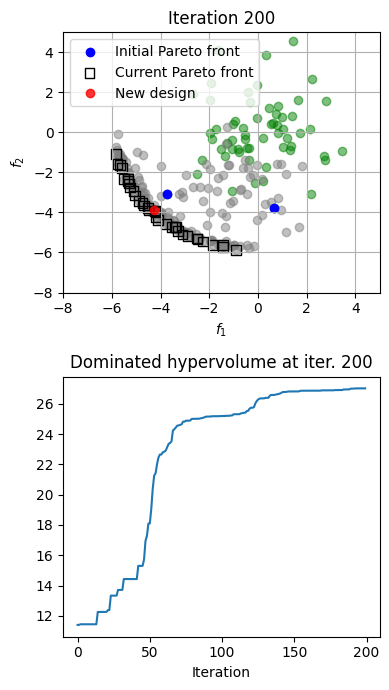

Optimization completed ...


In [9]:
# Import OmniTest from pymoo
from pymoo.problems.multi.omnitest import OmniTest
Test_function_pymoo = OmniTest(n_var = n_dimensions)

# Import initial sampling plan
X_train_dic = scipy.io.loadmat('data/two_objective_Omni_6_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = Test_function_pymoo.evaluate(X_train, return_values_of=["F"])
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model_EPDC(X_train_n, f1_train)
    m2 = build_GPR_model_EPDC(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model_EPDC(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model_EPDC(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EPDC(GPR_models, EPDC_2_obj, X_train_n, PFn, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = Test_function_pymoo.evaluate(x_new_original, return_values_of=["F"])

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, Expected_min_distance_i, penal_dist_x_i = EPDC_2_obj(x_new, GPR_models, X_train_n, PFn, Sigmoid_X, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)
    
    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("Distance to closest Pareto design:", Expected_min_distance_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='upper left')
        ax1.set_xlim([-8, 5])
        ax1.set_ylim([-8, 5])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')

**ZDT3:** Problem with a segmented Pareto front and six design variables.

Optimization settings

In [10]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 200 # Total number of iterations
n_dimensions = 6 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((np.zeros((1,n_dimensions)),np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

n_mc_samples = 300  # Number of Monte-Carlo samples to estimate the EPDC
gamma_dominated = -1 # Penalization weigth of dominated monte-carlo samples used by the EPDC
gamma_pareto = 1 # Penalization weigth of optimal monte-carlo samples used by the EPDC
num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([1., 7.]) # Reference point for calculation of dominated hypervolume

Optimization loop

Iteration: 1
New design: [0.16611493 0.0883283  0.03118021 0.09249282 0.09344664 0.18722798]
Initial HV: 4.7914357726112735
Current HV: 4.7914357726112735
Acquisition function: 0.30229425
Distance to closest Pareto design: 0.20229426
Similar design penalization: 1.0


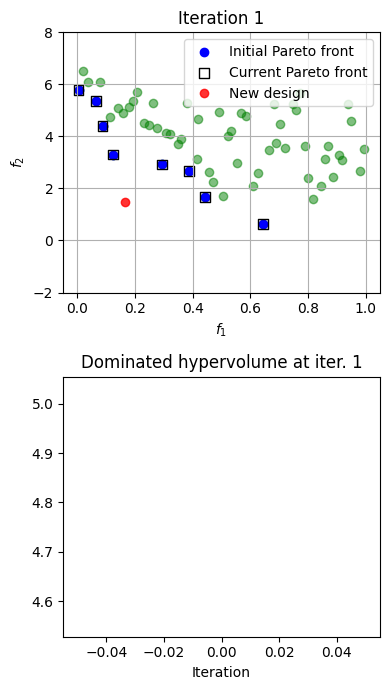

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
New design: [0.02904909 0.12970401 0.10244102 0.05145684 0.09362773 0.17505128]
Initial HV: 4.7914357726112735
Current HV: 6.057294512570136
Acquisition function: 0.17587772
Distance to closest Pareto design: 0.076268956
Similar design penalization: 0.99608773


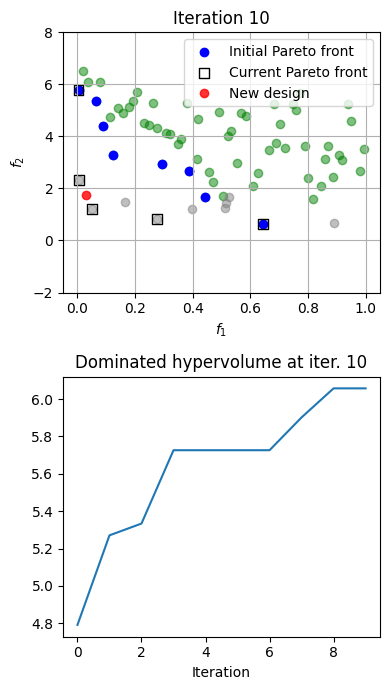

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
New design: [0.87242801 0.02509779 0.02224141 0.04634028 0.06984249 0.05958552]
Initial HV: 4.7914357726112735
Current HV: 6.600929002486433
Acquisition function: 0.12123285
Distance to closest Pareto design: 0.021233011
Similar design penalization: 0.9999984


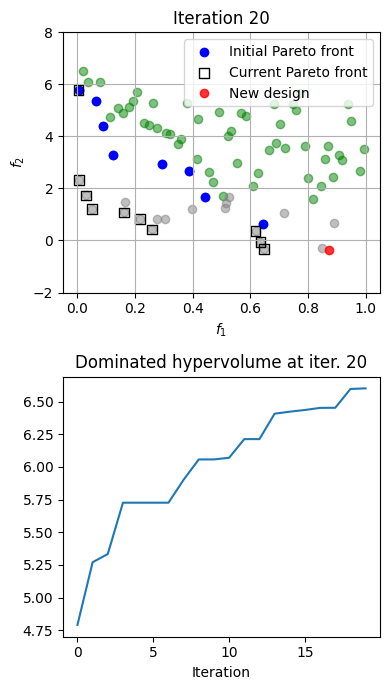

Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
New design: [0.00238848 0.18670736 0.19991684 0.05109294 0.30164867 0.33399926]
Initial HV: 4.7914357726112735
Current HV: 6.685063281196695
Acquisition function: 0.1107331
Distance to closest Pareto design: 0.010733132
Similar design penalization: 0.99999964


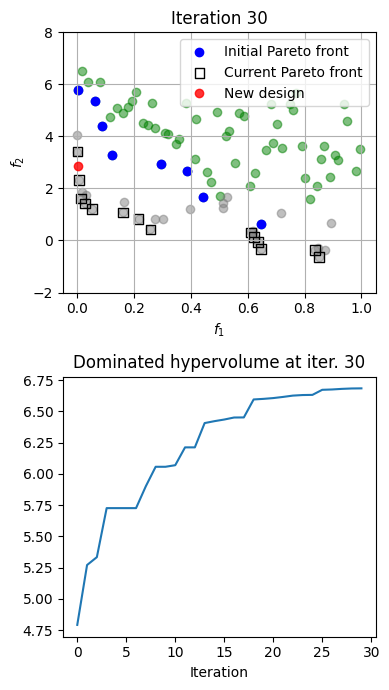

Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
New design: [0.01015696 0.01177335 0.12813831 0.26615293 0.12181734 0.01614109]
Initial HV: 4.7914357726112735
Current HV: 6.70334638171723
Acquisition function: 0.099509805
Distance to closest Pareto design: -0.00049015187
Similar design penalization: 0.9999996


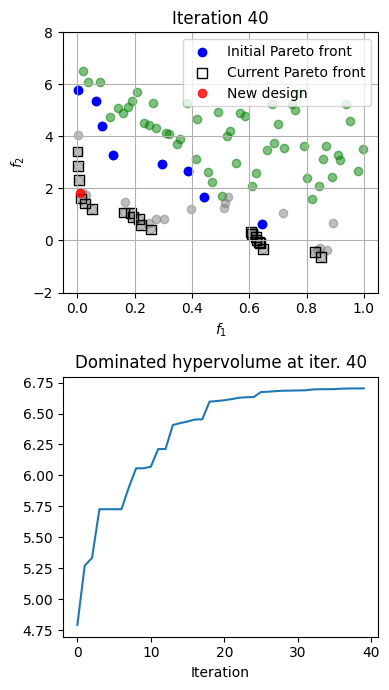

Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
New design: [0.00699274 0.0301421  0.06556122 0.11865208 0.01881412 0.08692635]
Initial HV: 4.7914357726112735
Current HV: 6.7396715648682495
Acquisition function: 0.113219544
Distance to closest Pareto design: 0.014180415
Similar design penalization: 0.99039125


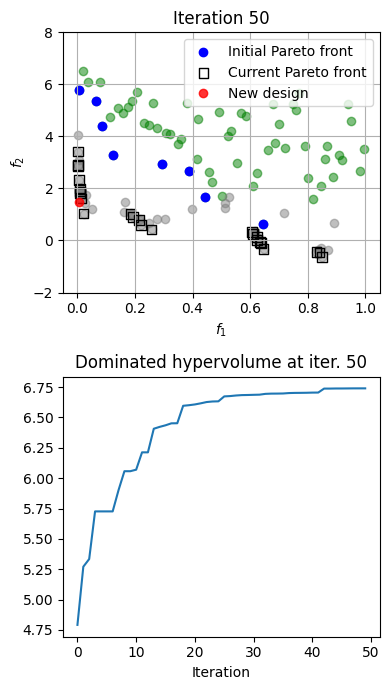

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
New design: [0.62544206 0.03510236 0.00552188 0.02093122 0.12808145 0.10609242]
Initial HV: 4.7914357726112735
Current HV: 6.7456041427563385
Acquisition function: 0.09690133
Distance to closest Pareto design: -0.001462781
Similar design penalization: 0.9836411


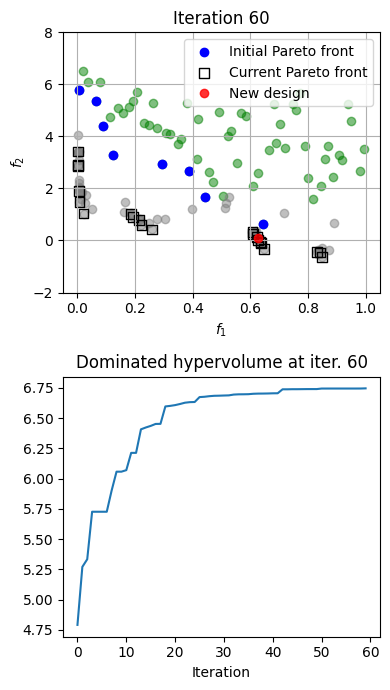

Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
New design: [0.00101863 0.40023283 0.05404206 0.25148407 0.60044138 0.10804534]
Initial HV: 4.7914357726112735
Current HV: 6.747076238357195
Acquisition function: 0.098705
Distance to closest Pareto design: -0.0012933278
Similar design penalization: 0.9999833


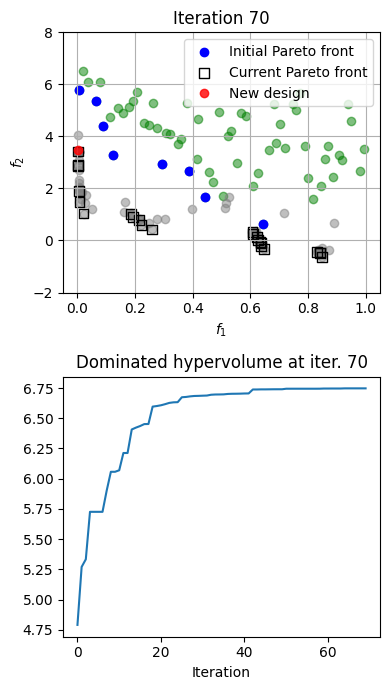

Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
New design: [0.00146915 0.78201099 0.33464217 0.36273884 0.68692177 0.29455103]
Initial HV: 4.7914357726112735
Current HV: 6.748950424686846
Acquisition function: 0.09800179
Distance to closest Pareto design: -0.0019957228
Similar design penalization: 0.9999751


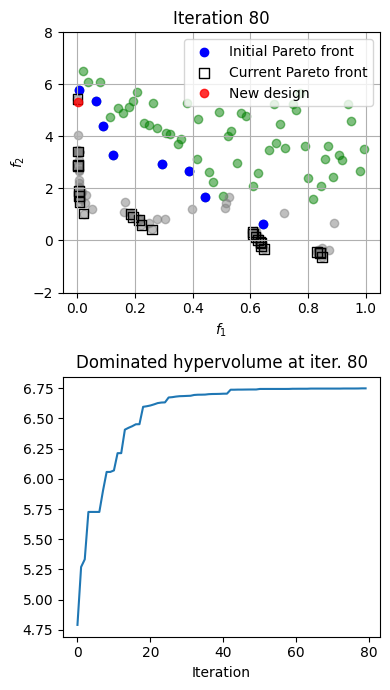

Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
New design: [0.00626308 0.34212971 0.12471209 0.29326048 0.1577094  0.09343501]
Initial HV: 4.7914357726112735
Current HV: 6.749645013667699
Acquisition function: 0.097232044
Distance to closest Pareto design: -0.0027678998
Similar design penalization: 0.9999994


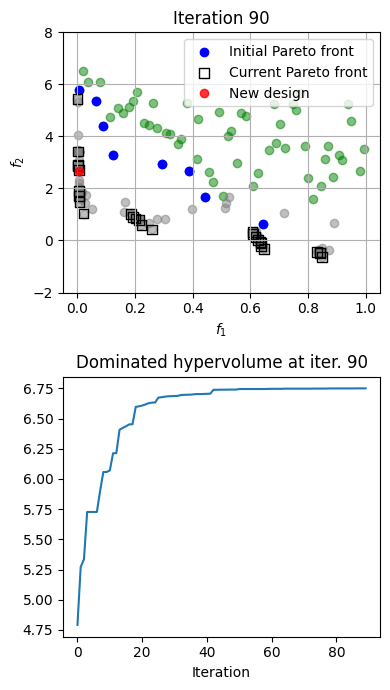

Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
New design: [0.84327521 0.1642904  0.03246627 0.02415313 0.02435986 0.01264762]
Initial HV: 4.7914357726112735
Current HV: 6.750655180632219
Acquisition function: 0.09466825
Distance to closest Pareto design: -0.0038875798
Similar design penalization: 0.9855583


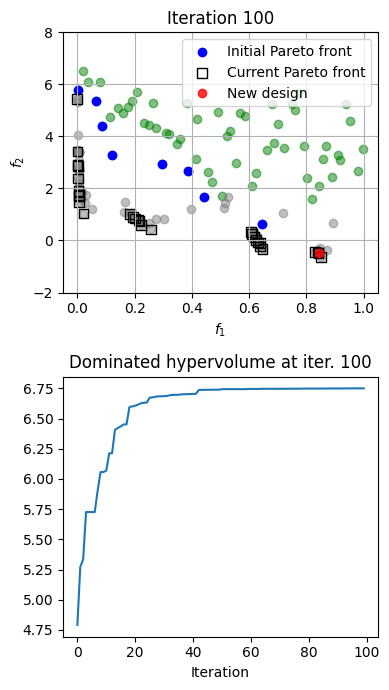

Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
New design: [0.00477371 0.26367336 0.16900822 0.17727588 0.53667852 0.27090166]
Initial HV: 4.7914357726112735
Current HV: 6.750679907088233
Acquisition function: 0.09583232
Distance to closest Pareto design: -0.004121021
Similar design penalization: 0.99953336


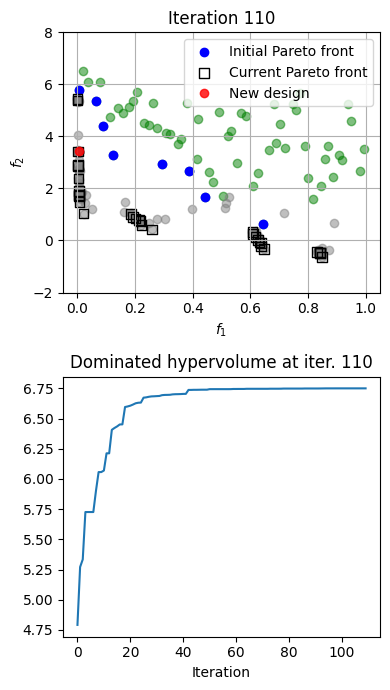

Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
New design: [0.00094218 0.91003356 0.40517628 0.18183403 0.46910653 0.50694067]
Initial HV: 4.7914357726112735
Current HV: 6.750853253922091
Acquisition function: 0.09649552
Distance to closest Pareto design: -0.0034866512
Similar design penalization: 0.99982166


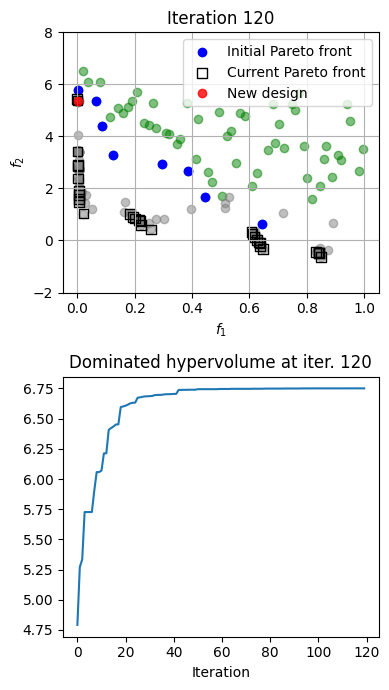

Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126
Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
New design: [0.00343284 0.56293289 0.1877473  0.29860448 0.21140345 0.1430383 ]
Initial HV: 4.7914357726112735
Current HV: 6.751878652027335
Acquisition function: 0.09626764
Distance to closest Pareto design: -0.0036901617
Similar design penalization: 0.999578


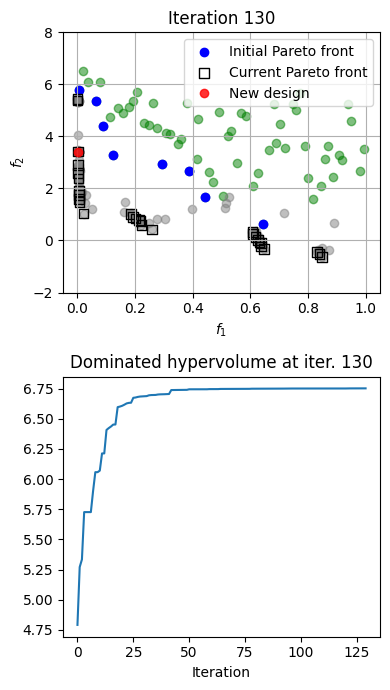

Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
New design: [0.00098627 0.68236252 0.73807033 0.32747349 0.18233805 0.57455194]
Initial HV: 4.7914357726112735
Current HV: 6.7520564556189155
Acquisition function: 0.09653449
Distance to closest Pareto design: -0.003460807
Similar design penalization: 0.999953


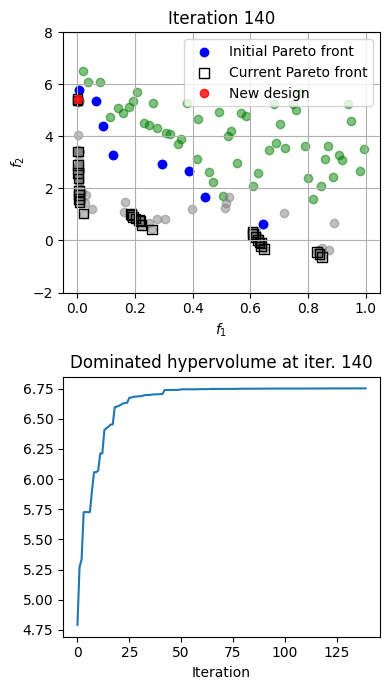

Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
Iteration: 150
New design: [0.00469952 0.24427302 0.22906274 0.31013211 0.21265993 0.41637023]
Initial HV: 4.7914357726112735
Current HV: 6.7520564556189155
Acquisition function: 0.09588
Distance to closest Pareto design: -0.004085544
Similar design penalization: 0.9996554


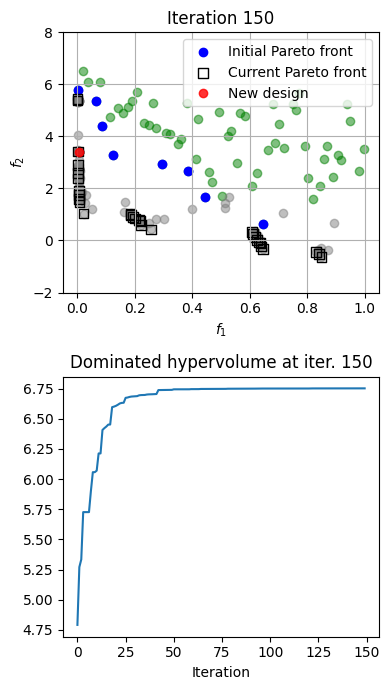

Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
New design: [0.00386768 0.56146608 0.56404256 0.36143638 0.37812105 0.65945737]
Initial HV: 4.7914357726112735
Current HV: 6.752656277527327
Acquisition function: 0.09505889
Distance to closest Pareto design: -0.0049325307
Similar design penalization: 0.99991417


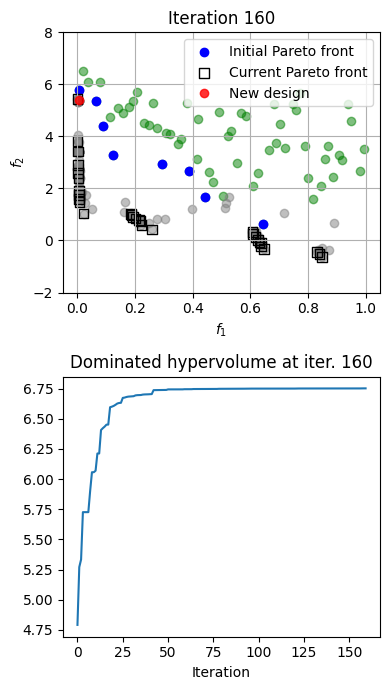

Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
New design: [0.00464397 0.36845657 0.25877116 0.00973039 0.02064357 0.14606647]
Initial HV: 4.7914357726112735
Current HV: 6.752656277527327
Acquisition function: 0.09769755
Distance to closest Pareto design: -0.0022431551
Similar design penalization: 0.999407


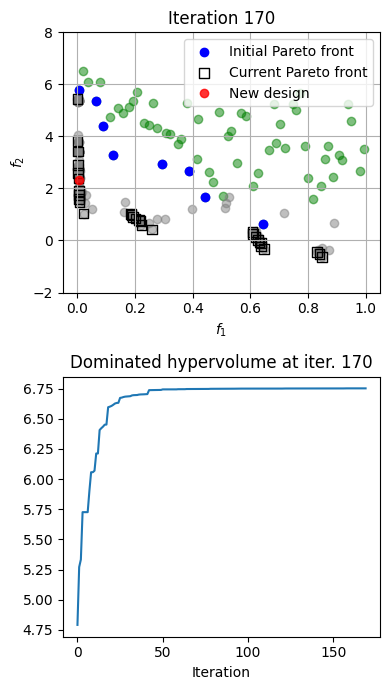

Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176
Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
New design: [0.00436913 0.15897268 0.0988026  0.01268215 0.10862167 0.40091379]
Initial HV: 4.7914357726112735
Current HV: 6.752682503722152
Acquisition function: 0.09746049
Distance to closest Pareto design: -0.0024959836
Similar design penalization: 0.9995647


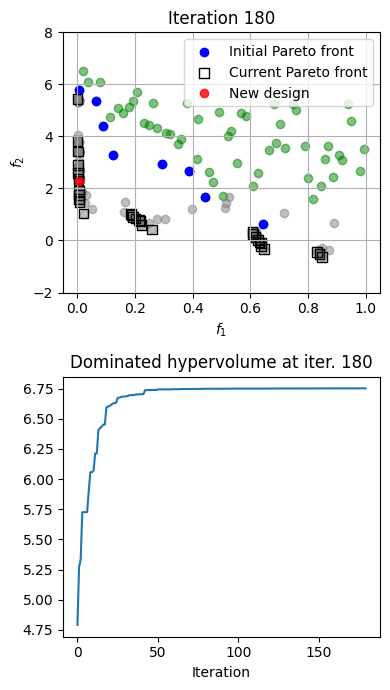

Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
New design: [0.00512305 0.25152089 0.03821801 0.06939734 0.32660571 0.10655232]
Initial HV: 4.7914357726112735
Current HV: 6.752709946516842
Acquisition function: 0.098826274
Distance to closest Pareto design: -0.0010966628
Similar design penalization: 0.9992294


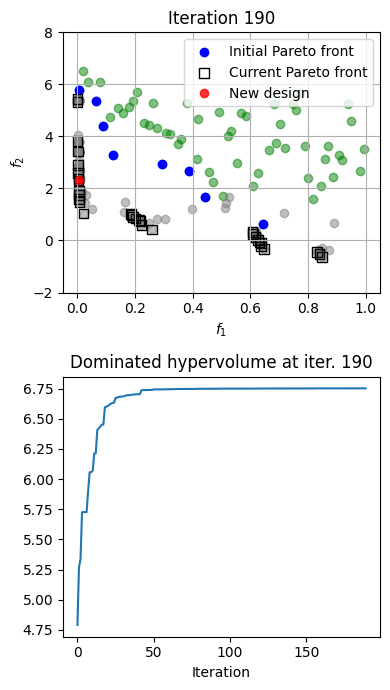

Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
Iteration: 200
New design: [0.00219508 0.56130686 0.57080806 0.32885128 0.58351    0.43743034]
Initial HV: 4.7914357726112735
Current HV: 6.753395213975172
Acquisition function: 0.09819647
Distance to closest Pareto design: -0.0017972782
Similar design penalization: 0.9999375


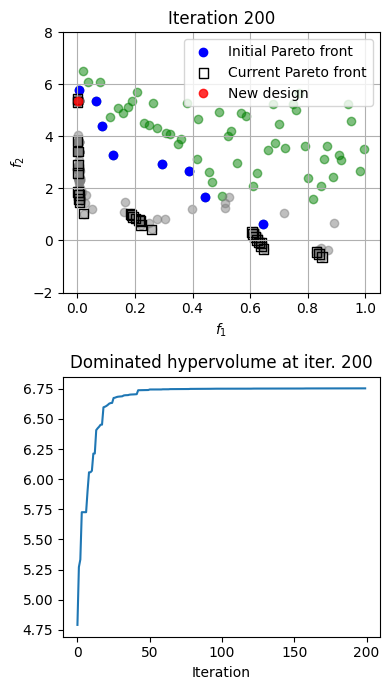

Optimization completed ...


In [11]:
# Import initial sampling plan. We are using a sampling plan located in the data directory to enable reproducibility of results.
X_train_dic = scipy.io.loadmat('data/two_objective_ZDT3_6_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = test_function.ZDT3(X_train, n_dimensions)
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model_EPDC(X_train_n, f1_train)
    m2 = build_GPR_model_EPDC(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model_EPDC(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model_EPDC(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EPDC(GPR_models, EPDC_2_obj, X_train_n, PFn, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = test_function.ZDT3(x_new_original, n_dimensions)

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, Expected_min_distance_i, penal_dist_x_i = EPDC_2_obj(x_new, GPR_models, X_train_n, PFn, Sigmoid_X, eff_length, n_mc_samples, gamma_dominated, gamma_pareto, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)

    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("Distance to closest Pareto design:", Expected_min_distance_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='upper right')
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-2, 8])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')